In [1]:
from scipy.stats import t
from scipy.stats import norm
import numpy as np

Ejercicio 1: Tiempo de Espera en una Parada de Autobús

En una parada de autobús, el tiempo de espera para el próximo autobús sigue una distribución exponencial con una tasa de llegada promedio de 4 autobuses por hora.

a) ¿Cuál es la probabilidad de que un pasajero espere menos de 10 minutos por el próximo autobús?

b) Simula en Python 1000 tiempos de espera y representa el histograma de la distribución.

In [50]:
#Probabilidad de que un pasajero espere menos de 10 minutos el proximo autobus

prob = expon.cdf(1/6, scale = 1/4)
print(f"Probabilidad de que un pasajero espere menos de 10 minutos el proximo bus es: {prob:.4f}")


Probabilidad de que un pasajero espere menos de 10 minutos el proximo bus es: 0.4866


Text(0.5, 0, 'Autobuses por hora')

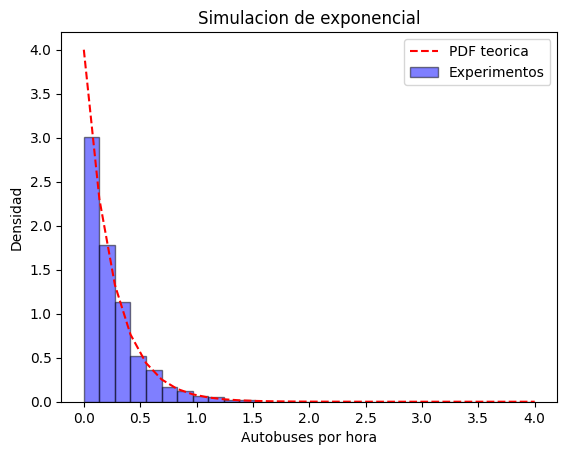

In [13]:
from scipy.stats import expon

# Fijamos semilla
np.random.seed(1)

lamnda_rate = 4 # tasa de llegada
scale = 1/lamnda_rate

# Generamos 1000 valores de la distribución exponencial
data = expon.rvs(scale=scale, size=1000)

import matplotlib.pyplot as plt

# Histograma
bins = np.linspace(0, 4, 30)

#funcion de densidad de probabilidad exponiencial teorica
x = np.linspace(0, 4, 30)
y = expon.pdf(x, scale=scale)

plt.plot(x, y, 'r--', label='PDF teorica')

plt.hist(data, bins=bins, alpha=0.5, label='Experimentos', density=True, color='blue', edgecolor='black')
plt.title('Simulacion de exponencial')
plt.legend(loc='upper right')
plt.ylabel('Densidad')
plt.xlabel('Autobuses por hora')

Ejercicio 2: Puntuaciones en un Examen

Las puntuaciones de un examen siguen una distribución normal con una media de 70 y una desviación estándar de 8.

a) ¿Cuál es la probabilidad de que un estudiante obtenga una puntuación entre 65 y 85?

b) Si se requiere estar en el 10% superior para aprobar con honores, ¿cuál es la puntuación mínima necesaria?

c) Genera en Python una muestra aleatoria de 500 puntuaciones y representa su distribución mediante un histograma.

In [14]:
# Cual es la probabilidad de que un estudiante obtenga una puntuacion entre 65 y 85

mu = 70 # media
desv = 8 # desviacion estandar
x1 = 65
x2 = 85

# Normalizamos
z1 = (x1 - mu) / desv
z2 = (x2 - mu) / desv
# Calculamos la probabilidad
prob = norm.cdf(z2) - norm.cdf(z1)
print(f"Probabilidad de que un estudiante obtenga una puntuacion entre 65 y 85 es: {prob:.4f}")

Probabilidad de que un estudiante obtenga una puntuacion entre 65 y 85 es: 0.7036


La puntuacion minima que se necesita para aprobar con honores es: 80.2524


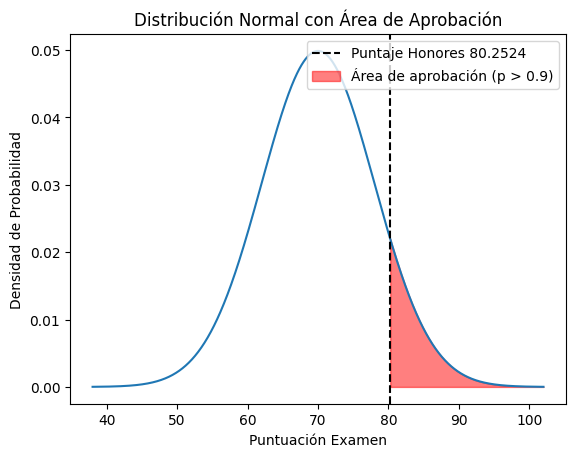

In [43]:
#Si se requiere estar en el 10% superior para aprobar con honores, ¿cuál es la puntuación mínima necesaria?

# Parametros de la distribucion normal
mu = 70  # Media
desv = 8  #Desviacion estandar

# Probabilidad de estar en el 10% superior
p = 0.90

# Calculamos el puntaje minimo para aprobar con honores 10 % superior
punt = norm.ppf(p)
punt = punt * desv + mu
print(f"La puntuacion minima que se necesita para aprobar con honores es: {punt:.4f}")

# Definimos eje x para la grafica   
x = np.linspace(mu - 4*desv, mu + 4*desv, 1000)

# Dibujamos la distribucion normal
plt.plot(x, norm.pdf(x, mu, desv))
plt.axvline(punt, color='black', linestyle='--', label=f'Puntaje Honores {punt:.4f}')

# Relleno del area de aprobacion (p > 0.90)
x_fill = np.linspace(mu + 4*desv, punt, 1000)
plt.fill_between(x_fill, norm.pdf(x_fill, mu, desv), alpha=0.5, color='red', label=f'Área de aprobación (p > {p})')

# Se agregan etiquetas y titulos
plt.xlabel('Puntuación Examen')
plt.ylabel('Densidad de Probabilidad')
plt.title('Distribución Normal con Área de Aprobación')
plt.legend(loc = 'upper right')

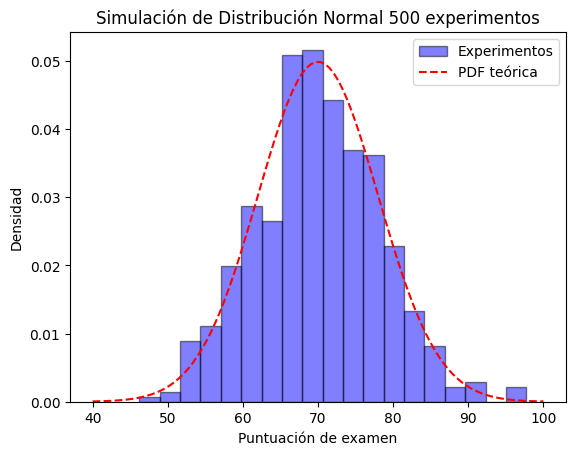

In [24]:
#Simulacion de la distribucion normal 500 puntuaiones de estudiantes
np.random.seed(100)
mu = 70
desv = 8
size = 500

# Simulamos 500 valores de la distribución normal con media 70 y desviación estándar 8
sim = norm.rvs(loc=mu, scale=desv, size=size)
# Histograma
plt.hist(sim, bins='auto', alpha=0.5, label='Experimentos', density=True, color='blue', edgecolor='black')
# PDF teórica
x = np.linspace(40, 100, 100)
y = norm.pdf(x, loc=mu, scale=desv)
plt.plot(x, y, 'r--', label='PDF teórica')

plt.title('Simulación de Distribución Normal 500 experimentos')
plt.ylabel('Densidad')
plt.xlabel('Puntuación de examen')
plt.legend(loc='upper right')

Ejercicio 3: Defectos en un Proceso de Manufactura

En una línea de producción, el número de defectos por metro de tela sigue una distribución de Poisson con una media de 2 defectos por metro.

a) ¿Cuál es la probabilidad de encontrar exactamente 3 defectos en un metro de tela?

b) ¿Cuál es la probabilidad de que haya al menos un defecto en un metro de tela?

c) Simula en Python el número de defectos en 1000 metros de tela y representa el histograma correspondiente.

In [74]:
#¿Cuál es la probabilidad de encontrar exactamente 3 defectos en un metro de tela?

from scipy.stats import poisson

# Parametro lambda
lam = 2

# Probabilidad de encontrar exactamente 3 defectos
prob = poisson.pmf(3, lam)
print(f"Probabilidad de encontrar exactamente 3 defectos en un metro de tela es: {prob:.4f}")

Probabilidad de encontrar exactamente 3 defectos en un metro de tela es: 0.1804


In [59]:
#  ¿Cuál es la probabilidad de que haya al menos un defecto en un metro de tela?

# Probabilidad de encontrar al menos un defecto
prob = 1 - poisson.cdf(0, lam)
print(f"Probabilidad de que haya al menos un defecto en un metro de tela es: {prob:.4f}")

Probabilidad de que haya al menos un defecto en un metro de tela es: 0.8647


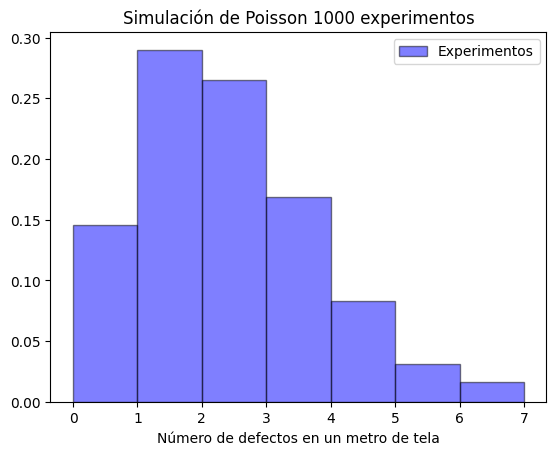

In [81]:
# Simula en Python el número de defectos en 1000 metros de tela y representa el histograma correspondiente.

# Fijamos semilla
np.random.seed(10)

# Parametro lambda
lam = 2

# Simulamos 1000 valores de la distribución de Poisson
poisson_data = poisson.rvs(lam, size=1000)

# Histograma
plt.hist(poisson_data, bins='auto', alpha=0.5, label='Experimentos', density=True, color='blue', edgecolor='black')

plt.title('Simulación de Poisson 1000 experimentos')
plt.xlabel('Número de defectos en un metro de tela')
plt.legend(loc='upper right')


Ejercicio 4: Vida Útil de una Batería

La vida útil (en horas) de una batería sigue una distribución gamma con forma 
k=3 y escala 
θ=500 horas.

a) ¿Cuál es la probabilidad de que una batería dure más de 1500 horas?

b) Calcula y representa en Python la función de densidad de probabilidad (PDF) de la distribución.

Probabilidad de que una bateria dure mas de 1500 horas es: 0.4232


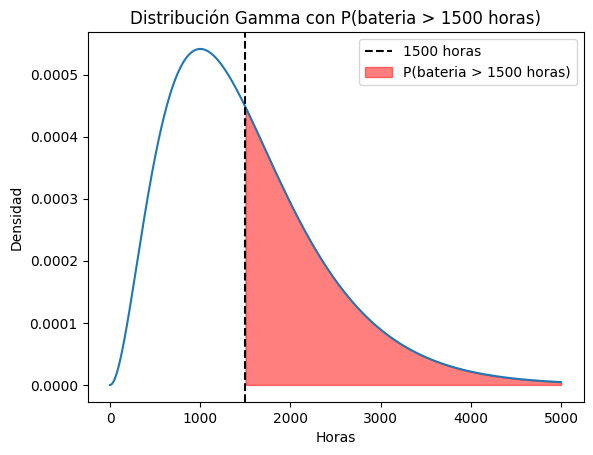

In [93]:
# ¿Cuál es la probabilidad de que una batería dure más de 1500 horas?

from scipy.stats import gamma

# Parametros de la distribucion gamma
alpha = 3
beta = 500

# Probabilidad de que una bateria dure mas de 1500 horas
prob = 1 - gamma.cdf(1500, a=alpha, scale=beta)
print(f"Probabilidad de que una bateria dure mas de 1500 horas es: {prob:.4f}")

# Graficamos la distribucion gamma

# Definimos eje x para la grafica
x = np.linspace(0, 5000, 1000)
y = gamma.pdf(x, a=alpha, scale=beta)

plt.plot(x, y)
plt.axvline(1500, color='black', linestyle='--', label='1500 horas')
plt.fill_between(x, y, where=(x > 1500), alpha=0.5, color='red', label='P(bateria > 1500 horas)')
plt.title('Distribución Gamma con P(bateria > 1500 horas)')
plt.xlabel('Horas')
plt.ylabel('Densidad')
plt.legend(loc='upper right')


Ejercicio 5: Lluvias en una Región

El número de días de lluvia en un mes en una región sigue una distribución binomial con 
n=30 días y una probabilidad diaria de lluvia de 
p=0.2.

a) ¿Cuál es la probabilidad de que llueva exactamente 8 días en un mes?

b) Simula en Python el número de días de lluvia durante un año (12 meses) y representa la distribución de frecuencias.

In [97]:
from scipy.stats import binom

n = 30
p = 0.2

# Probabilidad de que llueva exactamente 8 dias
prob = binom.pmf(8, n, p)
print(f"Probabilidad de que llueva exactamente 8 dias en un mes es: {prob:.4f}")

Probabilidad de que llueva exactamente 8 dias en un mes es: 0.1106


Text(0, 0.5, 'Número de días de lluvia')

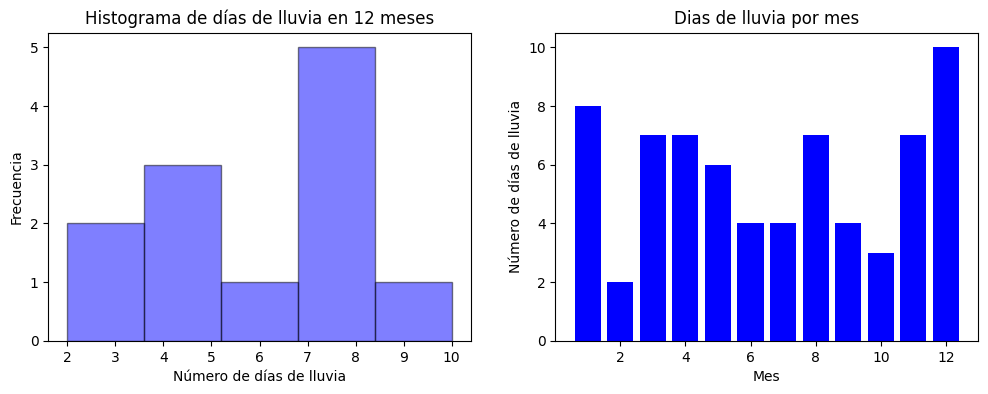

In [122]:
# Simula en Python el número de días de lluvia durante un año (12 meses) y representa la distribución de frecuencias.

# Fijamos semilla
np.random.seed(10)

# Parametros de la distribucion binomial
n = 30
p = 0.2

# Simulamos 12 meses valores de la distribución binomial
binom_data = binom.rvs(n, p, size=12)

f, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histograma
ax[0].hist(binom_data, bins='auto', alpha=0.5, label='Experimentos', color='blue', edgecolor='black')
ax[0].set_title('Histograma de días de lluvia en 12 meses')
ax[0].set_xlabel('Número de días de lluvia')
ax[0].set_ylabel('Frecuencia')

# Diagrama de barras
ax[1].bar(range(1, 13), binom_data, color='blue')
plt.title('Dias de lluvia por mes')
plt.xlabel('Mes')
plt.ylabel('Número de días de lluvia')


Ejercicio 6: Control de Calidad en una Fábrica de Bombillas

Una fábrica produce bombillas que, según especificaciones, tienen una vida útil que sigue una distribución normal con una media de 800 horas y una desviación estándar de 50 horas. Un ingeniero sospecha que una nueva máquina está produciendo bombillas con una vida útil diferente. Para comprobarlo, toma una muestra aleatoria de 36 bombillas producidas por la nueva máquina y encuentra que la vida útil media es de 785 horas.

a) Plantee las hipótesis nula y alternativa para probar si la nueva máquina está produciendo bombillas con una vida útil diferente a la especificada.

b) Utilice un nivel de significancia del 5% para realizar la prueba de hipótesis.

c) Calcule el valor p de la prueba.

d) ¿Cuál es su conclusión respecto a la nueva máquina?

# Resumen de Pruebas de hipótesis

| Estadístico|         Condiciones| Estadístico de prueba  | $ H_0 $   |$ H_1 $   | Región de rechazo |
|-------------------|-------------------|------------------------------|-----------------------------------|------------------------------|-----------------------------------|
| Media|$\sigma$ conocido, $n\geq 30$| $z=\cfrac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$  | $ \mu = \mu_0 $   |$ \mu \neq \mu_0 $    | $z < -z_{\alpha/2}$, o, $z > -z_{\alpha/2}$ |
| Media|$\sigma$ conocido, $n\geq 30$| $z=\cfrac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$  | $ \mu \leq \mu_0 $   |$ \mu > \mu_0 $    |  $z > z_{\alpha/2}$ |
| Media|$\sigma$ conocido, $n\geq 30$| $z=\cfrac{\bar{x}-\mu_0}{\sigma/\sqrt{n}}$  | $ \mu \geq \mu_0 $   |$ \mu < \mu_0 $    |  $z < -z_{\alpha/2}$ |
| Media|$\sigma$ desconocido, $n < 30$| $t=\cfrac{\bar{x}-\mu_0}{s/\sqrt{n}}$, $gl = n-1$  | $ \mu = \mu_0 $   |$ \mu \neq \mu_0 $    | $t < -t_{\alpha/2}$, o, $tz > -t_{\alpha/2}$ |
| Media|$\sigma$ desconocido, $n < 30$| $t=\cfrac{\bar{x}-\mu_0}{s/\sqrt{n}}$, $gl = n-1$  | $ \mu \leq \mu_0 $   |$ \mu > \mu_0 $    | $t >t_{\alpha}$ |
| Media|$\sigma$ desconocido, $n < 30$| $t=\cfrac{\bar{x}-\mu_0}{s/\sqrt{n}}$, $gl = n-1$  | $ \mu \geq \mu_0 $   |$ \mu < \mu_0 $    | $t <-t_{\alpha}$ |


In [132]:
# Plantee las hipótesis nula y alternativa para probar si la nueva máquina está produciendo bombillas 
# con una vida útil diferente a la especificada.

# Datos de la distribucion normal
mu = 800
desv = 50

n = 36
x = 785

# Hipotesis nula
# H0 : 'mu = 800'
# HA : 'mu != 800'

# Estadistico de prueba
z = (x - mu) / (desv / np.sqrt(n))
print(f"Estadistico de prueba: {z:.4f}")

# Calculamos el p-valor
p_value = norm.cdf(z)
p_value = 2 * p_value
print(f"p-valor: {p_value:.4f}")

# Nivel de significancia
alpha = 0.05

# Decision
if p_value < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No rechazamos la hipotesis nula")


Estadistico de prueba: -1.8000
p-valor: 0.0719
No rechazamos la hipotesis nula


Con una confianza del 95% se concluye que la maquina produce bombillas con vida util similar ya que no es posible identificar diferencias entre las medias.

Ejercicio 7: Efectividad de un Nuevo Medicamento

Un laboratorio farmacéutico ha desarrollado un nuevo medicamento para reducir la presión arterial. Se sabe que la presión arterial sistólica de la población sigue una distribución normal con una media de 120 mmHg y una desviación estándar de 15 mmHg. Se administra el nuevo medicamento a una muestra de 25 pacientes, y se observa que la presión arterial media es de 112 mmHg.

a) Plantee las hipótesis nula y alternativa para determinar si el medicamento reduce significativamente la presión arterial.

b) Realice la prueba de hipótesis utilizando un nivel de significancia del 1%.

c) Calcule el valor p de la prueba.

d) Interprete los resultados y determine si el medicamento es efectivo.



In [131]:
# Datos de la distribucion normal de la poblacion

mu = 120 # media de la poblacion en mmHg
desv = 15 # desviacion estandar de la poblacion en mmHg


# Datos de la muestra
n = 25 # tamaño de la muestra 25 pacientes
x = 112 # media de la muestra en mmHg

# Prueba de Hipotesis para la media
#H0 : mu = 120
#HA : mu != 120

# Estadistico de prueba
z = (x - mu) / (desv / np.sqrt(n))
print(f"Estadistico de prueba: {z:.4f}")

# Calculamos el p-valor
p_valor = norm.cdf(z)
p_valor = 2 * p_valor

print(f"p-valor: {p_valor:.4f}")

# Nivel de significancia
alpha = 0.05

# Decision
if p_valor < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No rechazamos la hipotesis nula")

Estadistico de prueba: -2.6667
p-valor: 0.0077
Rechazamos la hipotesis nula


Con una confianza del 95% se concluye que el medicamento logra disminuir la presion arterial ya que la media de la muestra es diferente al de la poblacion

--------------------------------------------------------------------------------------------------------------------------------------------------
Ejercicio 8: Tasas de Llegadas en un Centro de Llamadas

El número de llamadas que recibe un centro de atención al cliente sigue una distribución de Poisson con una media de 5 llamadas por minuto. El gerente implementa un nuevo sistema y desea saber si ha afectado la tasa de llamadas. Durante un periodo de 30 minutos, registra un total de 180 llamadas.

a) Plantee las hipótesis para probar si el nuevo sistema ha cambiado la tasa de llamadas.

b) Realice una prueba de hipótesis al nivel de significancia del 5%.

c) Determine si hay evidencia suficiente para concluir que la tasa de llamadas ha cambiado.

In [135]:
#Datos de la distribucion de Poisson

lam = 5 # tasa de llegada de llamadas por minuto

# Datos de la distribucion de la muestra
tiempo = 30 # tiempo en minutos
llamadas = 180 # numero de llamadas
lam2 = 180 / 30 # tasa de llegada de llamadas por minuto
print(f"La tasa de llegada de llamadas por minuto es: {lam2:.0f}")

# Prueba de Hipotesis para la tasa de llegada

# H0 : lam = 5
# HA : lam != 5

# Estadistico de prueba
z = (lam2 - lam) / np.sqrt(lam)
print(f"Estadistico de prueba: {z:.4f}")

# Calculamos el p-valor

p_valor = norm.cdf(z)
p_valor = 2 * p_valor
print(f"p-valor: {p_valor:.4f}")

# Nivel de significancia
alpha = 0.05    

# Decision
if p_valor < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No rechazamos la hipotesis nula")

La tasa de llegada de llamadas por minuto es: 6
Estadistico de prueba: 0.4472
p-valor: 1.3453
No rechazamos la hipotesis nula


De la prueba de hipotesis de diferencia de medias se concluye que con un nivel de significancia del 95% no existe diferencia entre las medias muestrales y la de la poblacion, por ende no es posible concluir que la tasa de llamada ha cambiado tras el cambio implementado.

--------------------------------------------------------------------------------------------------------------------------------------------------

Ejercicio 9: Preferencia de Marca

Una empresa desea saber si la proporción de clientes que prefieren su marca ha aumentado después de una campaña publicitaria. Antes de la campaña, el 40% de los clientes prefería su marca. Después de la campaña, en una muestra de 200 clientes, 100 indican preferir su marca.

a) Establezca las hipótesis nula y alternativa.

b) Realice una prueba de hipótesis al nivel de significancia del 5%.

c) Calcule el valor p y concluya si la campaña fue efectiva en aumentar la preferencia de marca.

In [136]:
# Datos de la proporcion de la poblacion

p = 0.40 # proporcion de la poblacion

# Datos de la muestra
n = 200 # tamaño de la muestra
x = 100 # numero de personas que prefieren el producto
p2 = x / n # proporcion de la muestra

# Prueba de Hipotesis para la proporcion

# H0 : p >= 0.40
# HA : p < 0.40

# Estadistico de prueba
z = (p2 - p) / np.sqrt((p * (1 - p)) / n)
print(f"Estadistico de prueba: {z:.4f}")

# Calculamos el p-valor
z = norm.sf(z, 0, 1)
print(f"p-valor: {z:.4f}")

# Nivel de significancia
alpha = 0.05

# Decision  
if z < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No rechazamos la hipotesis nula")

Estadistico de prueba: 2.8868
p-valor: 0.0019
Rechazamos la hipotesis nula


De la prueba se concluye que con una confianza del 95% no existe evidencia significativa que la campaña haya aumentado la aceptacion del producto.

--------------------------------------------------------------------------------------------------------------------------------------------------

Ejercicio 10: Evaluación de un Programa Educativo


Una escuela implementa un nuevo programa educativo y quiere evaluar su efectividad en las calificaciones de matemáticas. Históricamente, las calificaciones siguen una distribución normal con una media de 70 y una desviación estándar de 10. Después de implementar el programa, una muestra de 50 estudiantes tiene una calificación media de 73.

a) Formule las hipótesis nula y alternativa para determinar si el programa ha mejorado las calificaciones.

b) Utilice un nivel de significancia del 2% para realizar la prueba.

c) ¿El programa educativo ha tenido un impacto significativo en las calificaciones?

In [138]:
#Datos de la distribucion normal
mu = 70 # media de la poblacion
desv = 10 # desviacion estandar de la poblacion

#Datos de la muestra
n = 50 # tamaño de la muestra
x = 73 # media

# Prueba de Hipotesis para la media
# H0 : mu >= 70
# HA : mu < 70

# Estadistico de prueba
z = (x - mu) / (desv / np.sqrt(n))
print(f"Estadistico de prueba: {z:.4f}")

# Calculamos el p-valor
p_valor = norm.sf(z, 0, 1)
print(f"p-valor: {p_valor:.4f}")

# Nivel de significancia
alpha = 0.02

# Decision
if p_valor < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No rechazamos la hipotesis nula")

Estadistico de prueba: 2.1213
p-valor: 0.0169
Rechazamos la hipotesis nula


De la prueba de hipotesis concluimos con un nivel de confianza del 98% que no es posible concluir que las calificaciones de los estudiantes hayan mejorado.

Ejercicio 11: Efectividad de dos métodos de enseñanza

Un investigador educativo quiere comparar la efectividad de dos métodos de enseñanza diferentes en el rendimiento de los estudiantes. Se seleccionan aleatoriamente 30 estudiantes y se dividen en dos grupos de 15 estudiantes cada uno. El primer grupo es enseñado con el método tradicional y el segundo grupo con el nuevo método. Después de un mes, se les aplica un examen estandarizado.

Grupo 1 (Método Tradicional): Media = 75, Desviación estándar = 8
Grupo 2 (Nuevo Método): Media = 80, Desviación estándar = 6
a) Formule las hipótesis nula y alternativa para determinar si hay una diferencia significativa en las medias de los dos grupos.

b) Utilice una prueba t para muestras independientes con un nivel de significancia del 5% para analizar los datos.

c) Interprete los resultados y concluya si el nuevo método es más efectivo.

In [144]:
# Datos de la muestra Metodo tradicional
m1 = 75
s1 = 8
n1 = 15

# Datos de la muestra Nuevo metodo
m2 = 80
s2 = 6
n2 = 15

#Diferencia de medias en hipotesis nula
d0 = 0
# Significancia
alpha = 0.05

#Diferencia de medias de las muestras
d = m1 - m2

# Estimacion del error estandar
se = np.sqrt(s1**2 / n1 + s2**2 / n2)
# Grados de libertad
df = (s1**2 / n1 + s2**2 / n2)**2 / ((s1**2 / n1)**2 / (n1 - 1) + (s2**2 / n2)**2 / (n2 - 1))
df = int(df)

# Valor critico y MARGEN DE ERROR
z_critico = t.ppf((1 + alpha)/ 2, df) # 2 colas
margen_error = z_critico * se

#Calculamos intervalos de confianza
ci_sup = d + margen_error
ci_inf = d - margen_error

print(f"Intervalo de confianza: ({ci_inf:.4f}, {ci_sup:.4f})")

# Prueba de hipótesis
# H0 : m1 - m2 = 0
# HA : m1 - m2 != 0

t_stat = (d - d0) / se

p_value = 2 * t.cdf(-np.abs(t_stat), df)

print(f"Estadístico t: {t_stat:.2f}")

print(f"P-valor: {p_value:.4f}")

print("Decisión basada en el p-valor")

if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

print(f"Método del valor crítico. Valor crítico: {z_critico:.2f}. Estadístico t: {t_stat:.2f}")

if t_stat > z_critico:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")


Intervalo de confianza: (-5.1635, -4.8365)
Estadístico t: -1.94
P-valor: 0.0642
Decisión basada en el p-valor
No rechazamos la hipótesis nula.
Método del valor crítico. Valor crítico: 0.06. Estadístico t: -1.94
No rechazamos la hipótesis nula.


Se concluye que con un nivel de confianza del 95% no existe evidencia significativa que indique diferencia de efectividad entre los metodos de enseñanza.

--------------------------------------------------------------------------------------------------------------------------------------------------

Ejercicio 12: Efecto de un programa de ejercicio en la presión arterial

Un médico quiere evaluar si un programa de ejercicio regular reduce la presión arterial sistólica en pacientes hipertensos. Se mide la presión arterial de 20 pacientes antes y después de participar en el programa durante 8 semanas.

Presión arterial media antes: 150 mmHg
Presión arterial media después: 140 mmHg
Desviación estándar de las diferencias: 10 mmHg
a) Establezca las hipótesis nula y alternativa para determinar si el programa reduce la presión arterial.

b) Realice una prueba t para muestras relacionadas (pareadas) al nivel de significancia del 1%.

c) ¿Es efectivo el programa de ejercicio para reducir la presión arterial?

In [147]:
# Datos de la muestra

pacientes = 20

# Datos de la muestra antes del ejercicio
media_antes = 150 
media_despues = 140
d = media_antes - media_despues

#media de las diferencias 
dif_media = d / pacientes
#error estandar de las diferencias
sd = np.sqrt((media_antes - dif_media)**2 + (media_despues - dif_media)**2 / pacientes - 1)

d0 = 0  # Diferencia de medias bajo la hipótesis nula
confidence_level = 0.99  # Nivel de confianza

# Grados de libertad
df = pacientes - 1
# Valor crítico y margen de error
z_critical = t.ppf((1 + confidence_level) / 2, df) # dos colas

# Intervalo de confianza
margin_error = z_critical * sd/np.sqrt(20)

ci_lower = dif_media - margin_error
ci_upper = dif_media + margin_error

print(f"Intervalo de confianza al 95%: ({ci_lower:.2f}, {ci_upper:.2f})")

# Prueba de hipótesis

# Estadistico de prueba

t_stat= (dif_media-d0)/(sd/np.sqrt(pacientes))


p_value = 2 * t.cdf(-np.abs(t_stat), df)

print(f"Estadístico t: {t_stat:.2f}")

print(f"P-valor: {p_value:.4f}")

print("Decisión basada en el p-valor")

if p_value < alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

print(f"Método del valor crítico. Valor crítico: {z_critical:.2f}. Estadístico t: {t_stat:.2f}")

if t_stat > z_critical:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")


Intervalo de confianza al 95%: (-97.20, 98.20)
Estadístico t: 0.01
P-valor: 0.9885
Decisión basada en el p-valor
No rechazamos la hipótesis nula.
Método del valor crítico. Valor crítico: 2.86. Estadístico t: 0.01
No rechazamos la hipótesis nula.


Ejercicio 13: Comparación de salarios entre dos departamentos

En una empresa, se quiere saber si existe una diferencia en los salarios promedio entre el departamento de ventas y el departamento de marketing. Se toman muestras aleatorias de empleados de ambos departamentos.

Ventas (n = 25): Media = $50,000, Desviación estándar = $5,000
Marketing (n = 30): Media = $52,000, Desviación estándar = $6,000
a) Plantee las hipótesis para probar si hay una diferencia significativa en los salarios medios de los dos departamentos.

b) Realice una prueba t para muestras independientes con un nivel de significancia del 5%, asumiendo que las varianzas son iguales.

c) Concluya si hay una diferencia significativa en los salarios entre los dos departamentos.

In [153]:
# Datos de la muestra Departamento de Ventas
m1 = 50000
s1 = 5000
n1 = 25

# Datos de la muestra Departamento de Marketing
m2 = 52000
s2 = 6000
n2 = 30

#Diferencia de medias en hipotesis nula
d0 = 0
# Significancia
alpha = 0.05

#Diferencia de medias de las muestras
d = m1 - m2

#estadistico de prueba
z = (d - d0) / np.sqrt((s1**2 / n1) + (s2**2 / n2))
print(f"Estadistico de prueba: {z:.4f}")
#calculo del p-valor
p_valor = norm.cdf(z, 0 , 1)
p_valor = 2 * p_valor
print(f"p-valor: {p_valor:.4f}")

# Nivel de significancia
alpha = 0.05

# Decision
if p_valor < alpha:
    print("Rechazamos la hipotesis nula")
    print("Hay diferencias significativas entre los salarios de los departamentos de ventas y marketing")
else:
    print("No rechazamos la hipotesis nula")
    print("No hay diferencias significativas entre los salarios de los departamentos de ventas y marketing con un nivel de confianza del 95%")


Estadistico de prueba: -1.3484
p-valor: 0.1775
No rechazamos la hipotesis nula
No hay diferencias significativas entre los salarios de los departamentos de ventas y marketing con un nivel de confianza del 95%


Ejercicio 14: Asociación entre Género y Preferencia de Producto (Prueba Chi-cuadrado)

Una empresa desea saber si existe una asociación entre el género de los consumidores y su preferencia por tres tipos de productos: A, B y C. Se realiza una encuesta a 200 personas y se obtienen los siguientes resultados:

Producto A	Producto B	Producto C	Total
Hombres	40	30	20	90
Mujeres	20	50	40	110
Total	60	80	60	200
a) Formule las hipótesis nula y alternativa para determinar si hay una asociación significativa entre el género y la preferencia de producto.

b) Realice una prueba chi-cuadrado de independencia al nivel de significancia del 5%.

c) Interprete los resultados y concluya si existe una asociación significativa entre el género y la preferencia de producto.

In [159]:
import pandas as pd
from scipy.stats import f

products = ['A', 'B', 'C']
values = [[40, 30, 20], [20, 50, 40]]
index = ['Hombres', 'Mujeres']

df = pd.DataFrame(values, index=index, columns=products)
df



,A,B,C
Hombres,40,30,20
Mujeres,20,50,40


In [162]:
import pandas as pd
from scipy.stats import chi2_contingency

# Data
products = ['A', 'B', 'C']
values = [[40, 30, 20], [20, 50, 40]]
index = ['Hombres', 'Mujeres']

# Create DataFrame
df = pd.DataFrame(values, index=index, columns=products)

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(df)

# Print Results
print(f"Chi Cuadrado F: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Grados de libertad: {dof}")

# Decision
alpha = 0.05
if p < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No rechazamos la hipotesis nula")


Chi Cuadrado F: 16.4983
P-Value: 0.0003
Grados de libertad: 2
Rechazamos la hipotesis nula


Ejercicio 15: Comparación de Varianzas entre Dos Procesos de Producción (Prueba F)

Una fábrica tiene dos máquinas, Máquina 1 y Máquina 2, que producen el mismo componente. Se sospecha que hay diferencias en la consistencia (variabilidad) de las piezas producidas por cada máquina. Para evaluar esto, se toman muestras aleatorias de las dimensiones de las piezas producidas por cada máquina.

Máquina 1: n = 20, Varianza muestral = 1.5 mm²
Máquina 2: n = 25, Varianza muestral = 0.9 mm²
a) Establezca las hipótesis nula y alternativa para determinar si las varianzas de los dos procesos son significativamente diferentes.

b) Realice una prueba F al nivel de significancia del 5% para comparar las varianzas.

c) Concluya si hay diferencias significativas en la variabilidad de las piezas producidas por las dos máquinas.

In [176]:
# Datos de las maquinas
from scipy.stats import f

n1 = 20 
n2 = 25
s1 = 1.5
s2 = 0.9
gl1 = n1 - 1
gl2 = n2 - 1 

f_stat = s1 / s2
print(f"Estadistico F: {f_stat:.4f}")

f1 = f.ppf(0.975, gl1, gl2)
f2 = f.ppf(0.025, gl1, gl2)
print(f"Valores criticos son {f2:.4f} y {f1:.4f}")

# Decision
if f_stat < f1 or f_stat > f2:
    print("Rechazamos la hipotesis nula")
    print("Hay diferencias significativas entre las varianzas de las maquinas")
else:
    print("No rechazamos la hipotesis nula")

Estadistico F: 1.6667
Valores criticos son 0.4078 y 2.3452
Rechazamos la hipotesis nula
Hay diferencias significativas entre las varianzas de las maquinas
